In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.shape

(200000, 9)

In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Preprocessing

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.dropna(inplace=True, axis=0)

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
# Dropping irrelevant columns
df = df.drop(['Unnamed: 0','key'],axis = 1)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [13]:
# pickup_datetime is not in the appropriate format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


## Identifying and Handling Outliers

<Axes: xlabel='fare_amount'>

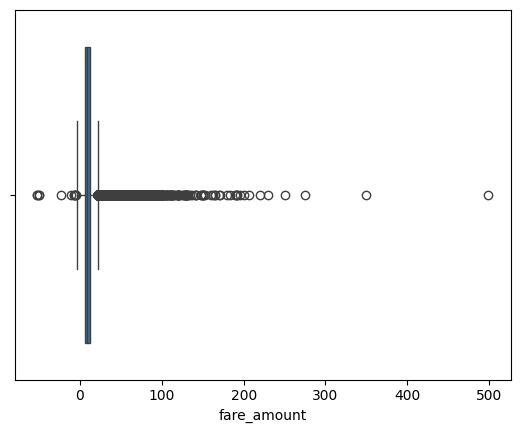

In [16]:
sns.boxplot(x = df['fare_amount'])
# plt.boxplot(x = df['fare_amount'])

<Axes: xlabel='fare_amount', ylabel='Density'>

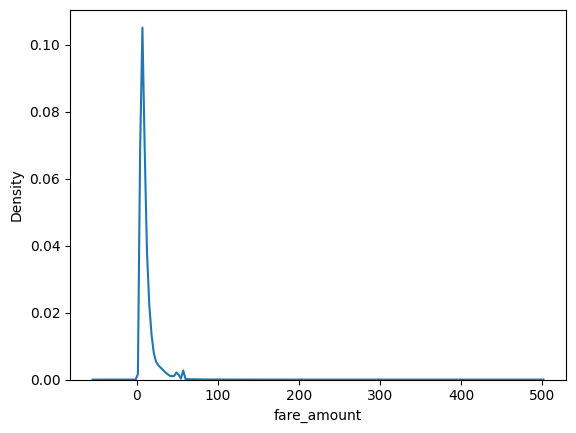

In [17]:
sns.kdeplot(df['fare_amount'])

<Axes: xlabel='fare_amount'>

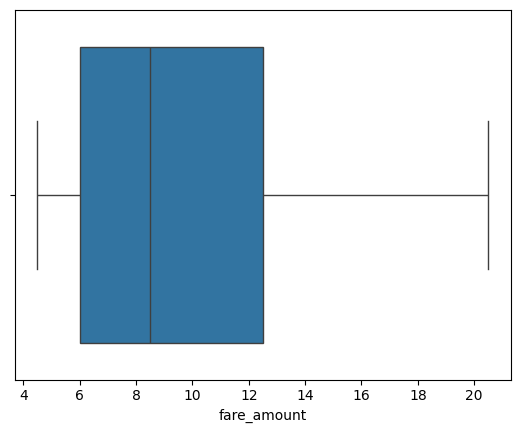

In [18]:
# Quantile based flooring and capping
# Values above 90 precentile are floored to 90 percentile and values below 10 percentile are capped to 10 percentile

ninety = np.percentile(df['fare_amount'],90)
ten = np.percentile(df['fare_amount'],10)

df['fare_amount'] = np.where(df['fare_amount'] > ninety,ninety,df['fare_amount'])
df['fare_amount'] = np.where(df['fare_amount'] < ten,ten,df['fare_amount'])

sns.boxplot(x = df['fare_amount'])

## Checking the correlation

In [19]:
df.corr()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.148733,0.004352,-0.002321,0.002407,-0.004505,0.013400
pickup_datetime,0.148733,1.000000,0.009363,-0.009677,0.008018,-0.010805,0.006398
pickup_longitude,0.004352,0.009363,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.002321,-0.009677,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.002407,0.008018,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.004505,-0.010805,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.013400,0.006398,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<Axes: >

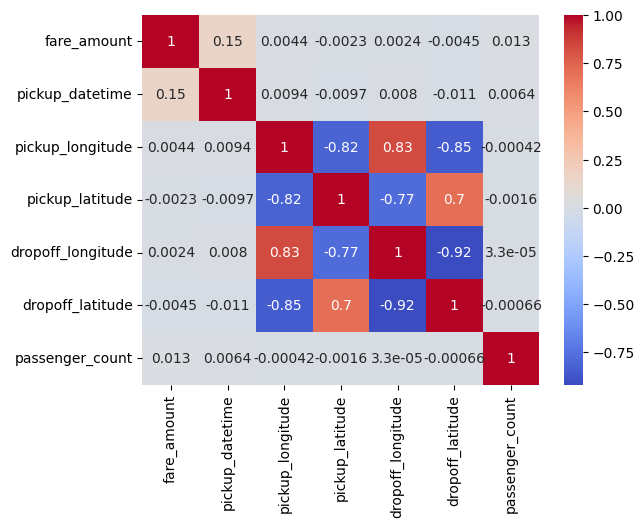

In [20]:
sns.heatmap(df.corr(),cmap = 'coolwarm',annot = True)

In [21]:
# Defining a distance measure for Linear Regression



In [22]:
# Defining a independent parameter

def calc_dist(lat_1,lat_2,lon_1,lon_2):
    lat_1,lat_2,lon_1,lon_2 = map(np.radians, [lat_1,lat_2,lon_1,lon_2])
    diff_lat = lat_2 - lat_1
    diff_lon = lon_2 - lon_1
    
    dist = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2)**2 + np.cos(lat_1)*np.cos(lat_2)*np.sin(diff_lon/2)**2))

    return dist


In [23]:
df = df[(df.pickup_latitude < 90) & (df.dropoff_latitude < 90) &
        (df.pickup_latitude > -90) & (df.dropoff_latitude > -90) &
        (df.pickup_longitude < 180) & (df.dropoff_longitude < 180) &
        (df.pickup_longitude > -180) & (df.dropoff_longitude > -180)]

df['Distance'] = [calc_dist(df['dropoff_latitude'][i], df['pickup_latitude'][i], df['dropoff_longitude'][i], df['pickup_longitude'][i])
                  for i in df.index]

In [24]:
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
6,20.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,11.731015
7,4.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,0.000000
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.332711
9,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.889417


In [25]:
df['Distance'] = df['Distance'].astype(float).round(2)

In [52]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).astype(int)/10**9
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,1.431028,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,7.7,1.247861,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,12.9,1.251150,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,5.3,1.246005,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,16.0,1.409248,-73.925023,40.744085,-73.973082,40.761247,5,4.48


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_datetime    199987 non-null  float64
 2   pickup_longitude   199987 non-null  float64
 3   pickup_latitude    199987 non-null  float64
 4   dropoff_longitude  199987 non-null  float64
 5   dropoff_latitude   199987 non-null  float64
 6   passenger_count    199987 non-null  int64  
 7   Distance           199987 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 17.8 MB


In [54]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [55]:
X

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,1.431028,-73.999817,40.738354,-73.999512,40.723217,1,1.68
1,1.247861,-73.994355,40.728225,-73.994710,40.750325,1,2.46
2,1.251150,-74.005043,40.740770,-73.962565,40.772647,1,5.04
3,1.246005,-73.976124,40.790844,-73.965316,40.803349,3,1.66
4,1.409248,-73.925023,40.744085,-73.973082,40.761247,5,4.48
...,...,...,...,...,...,...,...
199995,1.351421,-73.987042,40.739367,-73.986525,40.740297,1,0.11
199996,1.394759,-73.984722,40.736837,-74.006672,40.739620,1,1.88
199997,1.246236,-73.986017,40.756487,-73.858957,40.692588,2,12.85
199998,1.432134,-73.997124,40.725452,-73.983215,40.695415,1,3.54


In [56]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     4.5
199996     7.5
199997    20.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 199987, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [59]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [60]:
X_train

array([[ 1.76119633, -0.14210693,  0.13708658, ...,  0.13311017,
         0.22239638, -0.04720877],
       [-0.49383651, -0.14224367,  0.1376325 , ...,  0.13851832,
         0.22239638, -0.05116463],
       [-1.17528041, -0.14211592,  0.13926219, ...,  0.13777368,
        -0.4829337 , -0.04906723],
       ...,
       [ 1.2132738 , -0.14222654,  0.13803855, ...,  0.13028809,
        -0.4829337 , -0.03935015],
       [-0.14622065, -0.14092477,  0.14329485, ...,  0.14530565,
        -0.4829337 , -0.04890793],
       [-1.29523232, -0.14310004,  0.13535721, ...,  0.13455329,
        -0.4829337 , -0.05294344]])

## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [62]:
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
lr.predict(X_test)

array([10.68795756, 10.89465296,  9.81051427, ..., 10.11099905,
       10.89717939,  8.79676853])

In [64]:
y_test

49815      6.0
187947     9.0
162679     4.9
21965      6.0
47188     20.5
          ... 
132151    20.5
136168     8.9
63582     12.1
138431     7.0
104359     4.5
Name: fare_amount, Length: 59997, dtype: float64

In [65]:
print("Slope: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Slope:  [ 0.75383173  0.11294091  0.09263315 -0.12764918 -0.11435357  0.05196055
  0.07129351]
Intercept:  9.981638545610402


In [66]:
y_pred = lr.predict(X_test)

ValueError: x and y must be the same size

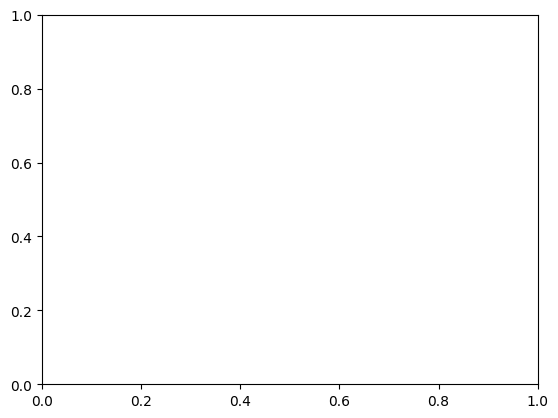

In [68]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train), color='red')
plt.xlabel('Distance')  # Independent variable
plt.ylabel('Fare Amount') # Dependent variable

In [69]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error:  4.037764015110852
Mean Squared Error:  24.59297617174704
RMSE:  4.959130586276897
R2 Score:  2.1445117900085076


In [72]:
from sklearn.metrics import metrics

metrics._scorer(y_test, y_pred)

ImportError: cannot import name 'metrics' from 'sklearn.metrics' (/home/pratham/.local/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=12, random_state=2)


In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score: ", metrics.r2_score(y_test, y_pred)*100)

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.xlabel('Distance')  # Independent variable
plt.ylabel('Fare Amount') # Dependent variable